In [1]:
from halton_points import HaltonPoints
from analytical_solution import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Implement_Thesis import *
from expressions import *

# Analytical solution

In [50]:
n = 1
interior_points = HaltonPoints(2, n).haltonPoints()
x, y = interior_points[:, 0], interior_points[:, 1]
t = 0.2
comp_x, comp_y = sol_burgers_2D_homogeneous(interior_points, t)

In [51]:
data = pd.DataFrame(np.hstack((x.reshape(-1,1), y.reshape(-1,1), comp_x, comp_y)), columns=['x', 'y', 'u', 'v'])

<AxesSubplot:xlabel='x', ylabel='y'>

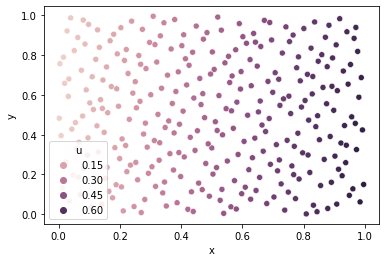

In [54]:
sns.scatterplot(x='x', y='y', hue='u', data=data, cmap = plt.cm.viridis)

<AxesSubplot:xlabel='x', ylabel='y'>

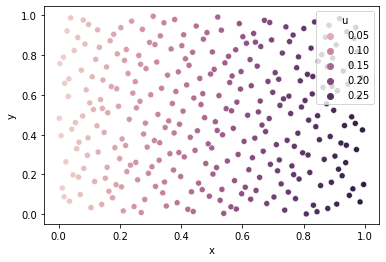

In [49]:
sns.scatterplot(x='x', y='y', hue='u', data=data, cmap = plt.cm.viridis)

# RK - Method

In [2]:
def Fm(uh, X0):
    for xn in uh.Mi:
        uh.x = xn
        yield uh.F_m(X0)[0], uh.J(X0)[0]

In [3]:
Mb = np.array([
    [0., 0.],
    [0., 0.5],
    [0., 1.],
    [0.5, 1.],
    [1., 1.],
    [1., 0.5],
    [1., 0.],
    [0.5, 0.]
])

poly_b = np.array([[-1, -1, 1], [1/2, 3/2, -1], [3/2, 1/8, -3/8]])
x = np.array([0.16, .093])
npnts = 1

In [4]:
uh = assembled_matrix(Mb, npnts, 2, 1, poly_b=poly_b)
X0 = uh.X_0()
f = uh.F_m
FJ = np.vstack(tuple(Fm(uh, X0)))
F, J = FJ[::2], FJ[1::2]

In [8]:
print(X0)

[[0.74017685 0.98614323]]
